# Generators (Tradeoff Values)

## Notebook for generating tradeoff values (i.e. $\mu(f_i,f_j)$) from Pareto-optimal front

This notebook can be used to generate tradeoff values from all the Pareto-optimal data point files hard-coded in the dictionary `pfs`. Currently this notebook processes these Pareto-optimal fronts.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)
- GAA Problem (A 10-objective and 18-constraint general aviation design problem)

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate tradeoff values from all the Pareto-optimal front on all combinations  of dimensions

We generate and plot at the same time. The $\mu$ values will be saved in the same corresponding directories where the objective values are read from. During the plotting, will change the point size w.r.t. $\mu$ values. For coloring, we will use default color for non-constrained problems and use `cm.cool` for problems with constraint functions. The knee points will be colored as dark red.

../data/dtlz2/3d/dataf.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2
../data/dtlz2/4d/dataf.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2
../data/dtlz2/8d/dataf.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2


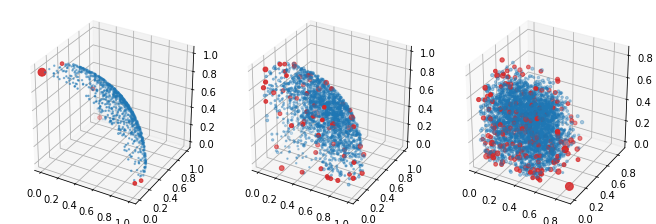

../data/dtlz2-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'dtlz2-nbi', '3d'] dtlz2-nbi
../data/dtlz2-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'dtlz2-nbi', '4d'] dtlz2-nbi
../data/dtlz2-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'dtlz2-nbi', '8d'] dtlz2-nbi


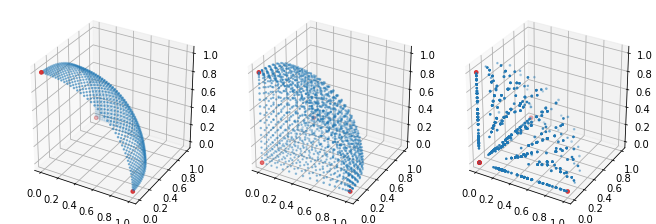

../data/debmdk/3d/dataf.csv (1047, 3) ['..', 'data', 'debmdk', '3d'] debmdk
../data/debmdk/4d/dataf.csv (1967, 4) ['..', 'data', 'debmdk', '4d'] debmdk
../data/debmdk/8d/dataf.csv (4077, 8) ['..', 'data', 'debmdk', '8d'] debmdk


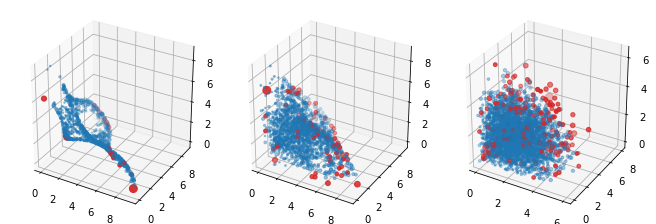

../data/debmdk-nbi/3d/dataf.csv (1143, 3) ['..', 'data', 'debmdk-nbi', '3d'] debmdk-nbi
../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi
../data/debmdk-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-nbi', '8d'] debmdk-nbi


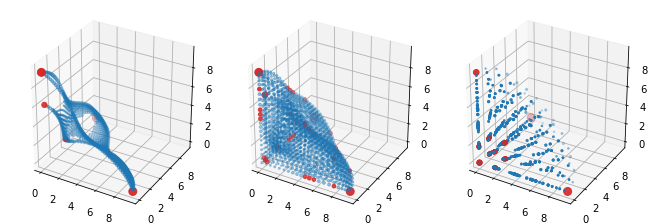

../data/debmdk-all/3d/dataf.csv (1000, 3) ['..', 'data', 'debmdk-all', '3d'] debmdk-all
../data/debmdk-all/4d/dataf.csv (2000, 4) ['..', 'data', 'debmdk-all', '4d'] debmdk-all
../data/debmdk-all/8d/dataf.csv (4000, 8) ['..', 'data', 'debmdk-all', '8d'] debmdk-all


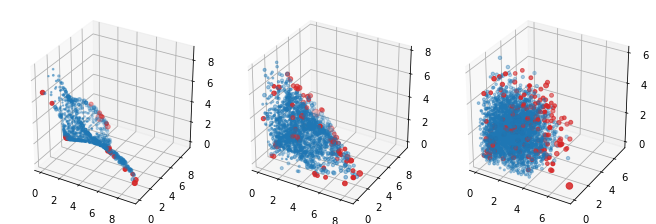

../data/debmdk-all-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'debmdk-all-nbi', '3d'] debmdk-all-nbi
../data/debmdk-all-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'debmdk-all-nbi', '4d'] debmdk-all-nbi
../data/debmdk-all-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-all-nbi', '8d'] debmdk-all-nbi


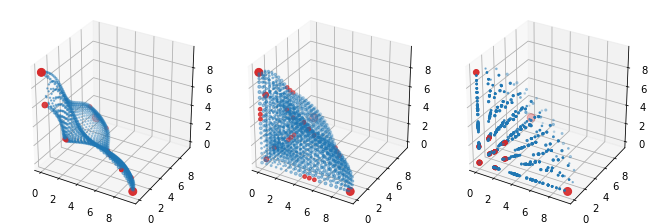

../data/dtlz8/3d/dataf.csv (1038, 3) ['..', 'data', 'dtlz8', '3d'] dtlz8
../data/dtlz8/4d/dataf.csv (2105, 4) ['..', 'data', 'dtlz8', '4d'] dtlz8
../data/dtlz8/6d/dataf.csv (2659, 6) ['..', 'data', 'dtlz8', '6d'] dtlz8
../data/dtlz8/8d/dataf.csv (3680, 8) ['..', 'data', 'dtlz8', '8d'] dtlz8


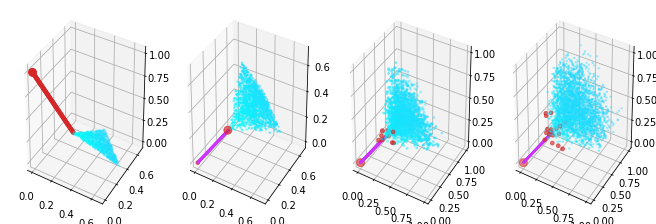

../data/dtlz8-nbi/3d/dataf.csv (1025, 3) ['..', 'data', 'dtlz8-nbi', '3d'] dtlz8-nbi
../data/dtlz8-nbi/4d/dataf.csv (2088, 4) ['..', 'data', 'dtlz8-nbi', '4d'] dtlz8-nbi
../data/dtlz8-nbi/6d/dataf.csv (3535, 6) ['..', 'data', 'dtlz8-nbi', '6d'] dtlz8-nbi
../data/dtlz8-nbi/8d/dataf.csv (2277, 8) ['..', 'data', 'dtlz8-nbi', '8d'] dtlz8-nbi


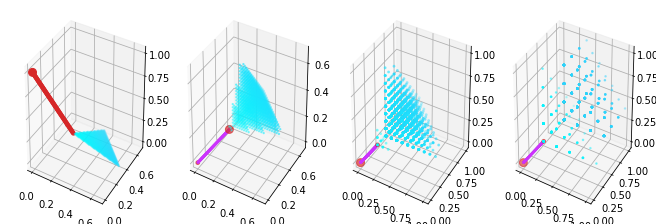

../data/c2dtlz2/3d/dataf.csv (1086, 3) ['..', 'data', 'c2dtlz2', '3d'] c2dtlz2
../data/c2dtlz2/4d/dataf.csv (2088, 4) ['..', 'data', 'c2dtlz2', '4d'] c2dtlz2
../data/c2dtlz2/5d/dataf.csv (2098, 5) ['..', 'data', 'c2dtlz2', '5d'] c2dtlz2
../data/c2dtlz2/8d/dataf.csv (4305, 8) ['..', 'data', 'c2dtlz2', '8d'] c2dtlz2


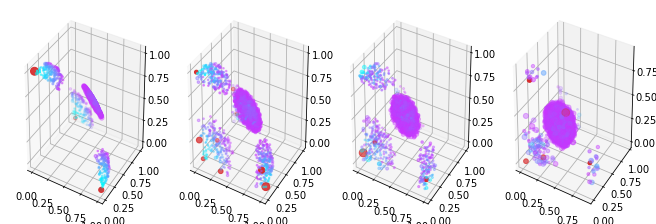

../data/c2dtlz2-nbi/3d/dataf.csv (1036, 3) ['..', 'data', 'c2dtlz2-nbi', '3d'] c2dtlz2-nbi
../data/c2dtlz2-nbi/4d/dataf.csv (1984, 4) ['..', 'data', 'c2dtlz2-nbi', '4d'] c2dtlz2-nbi
../data/c2dtlz2-nbi/5d/dataf.csv (2280, 5) ['..', 'data', 'c2dtlz2-nbi', '5d'] c2dtlz2-nbi
../data/c2dtlz2-nbi/8d/dataf.csv (3872, 8) ['..', 'data', 'c2dtlz2-nbi', '8d'] c2dtlz2-nbi


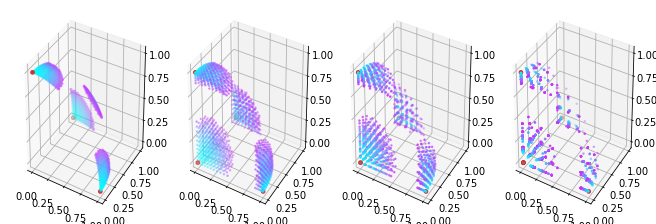

../data/cdebmdk/3d/dataf.csv (1099, 3) ['..', 'data', 'cdebmdk', '3d'] cdebmdk
../data/cdebmdk/4d/dataf.csv (1982, 4) ['..', 'data', 'cdebmdk', '4d'] cdebmdk
../data/cdebmdk/8d/dataf.csv (3919, 8) ['..', 'data', 'cdebmdk', '8d'] cdebmdk


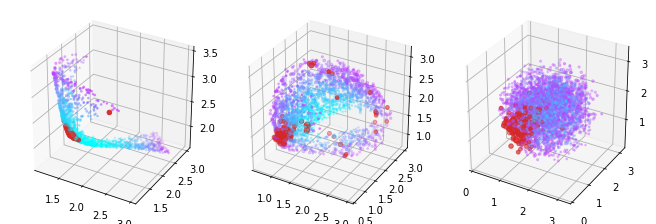

../data/cdebmdk-nbi/3d/dataf.csv (1049, 3) ['..', 'data', 'cdebmdk-nbi', '3d'] cdebmdk-nbi
../data/cdebmdk-nbi/4d/dataf.csv (2042, 4) ['..', 'data', 'cdebmdk-nbi', '4d'] cdebmdk-nbi
../data/cdebmdk-nbi/8d/dataf.csv (3380, 8) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi


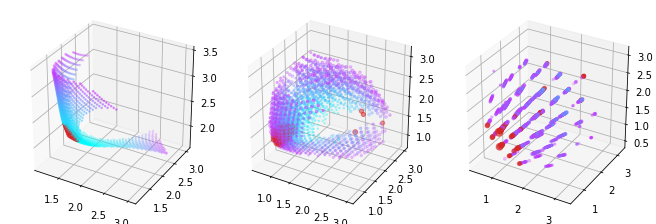

../data/c0dtlz2/3d/dataf.csv (1002, 3) ['..', 'data', 'c0dtlz2', '3d'] c0dtlz2
../data/c0dtlz2/4d/dataf.csv (2003, 4) ['..', 'data', 'c0dtlz2', '4d'] c0dtlz2
../data/c0dtlz2/8d/dataf.csv (4005, 8) ['..', 'data', 'c0dtlz2', '8d'] c0dtlz2


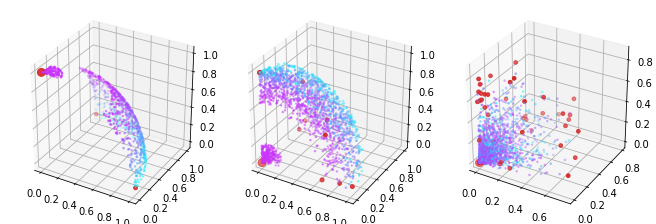

../data/c0dtlz2-nbi/3d/dataf.csv (983, 3) ['..', 'data', 'c0dtlz2-nbi', '3d'] c0dtlz2-nbi
../data/c0dtlz2-nbi/4d/dataf.csv (1916, 4) ['..', 'data', 'c0dtlz2-nbi', '4d'] c0dtlz2-nbi
../data/c0dtlz2-nbi/8d/dataf.csv (3180, 8) ['..', 'data', 'c0dtlz2-nbi', '8d'] c0dtlz2-nbi


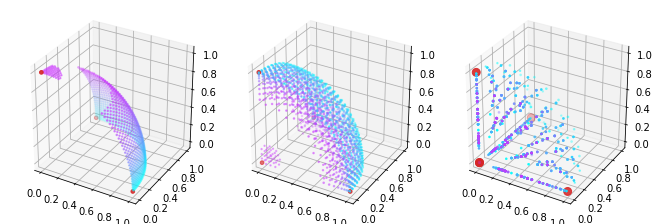

../data/crash-nbi/3d/dataf.csv (4450, 3) ['..', 'data', 'crash-nbi', '3d'] crash-nbi


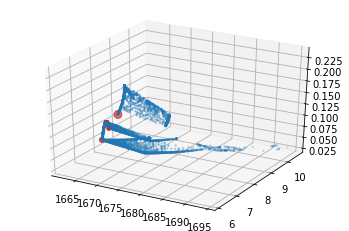

../data/crash-c1-nbi/3d/dataf.csv (711, 3) ['..', 'data', 'crash-c1-nbi', '3d'] crash-c1-nbi


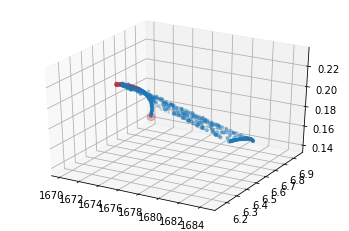

../data/crash-c2-nbi/3d/dataf.csv (3739, 3) ['..', 'data', 'crash-c2-nbi', '3d'] crash-c2-nbi


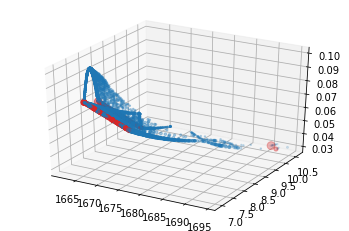

../data/gaa/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa', '10d'] gaa


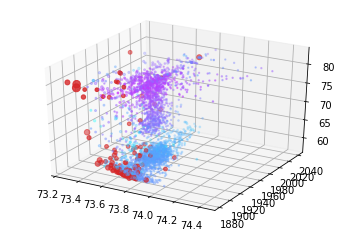

../data/gaa-nbi/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa-nbi', '10d'] gaa-nbi


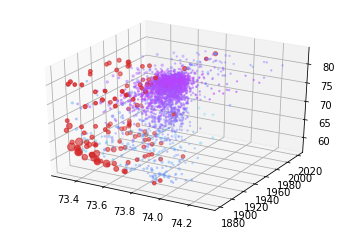

In [2]:
%matplotlib inline

sys.path.append('../')
from vis.utils import dm
from vis.utils import transform as tr

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

eps = dm.epsilons

for pf in list(pfs.keys()):
    if len(pfs[pf]) > 1:
        fig = plt.figure(figsize=(9, 3), constrained_layout=True)
    else:
        fig = plt.figure()
    row = len(pfs[pf])
    col = 1
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]

            F = np.loadtxt(fullpathf, delimiter=',')
            print(fullpathf, F.shape, dirs, frontname)
            
            
            Mu,Ik = dm.tradeoff(F, epsilon=eps[dim], penalize_extremes=False)
            mupathf = os.path.join(path, "mu.csv")
            np.savetxt(mupathf, Mu, delimiter=',', fmt="%1.4e")
            muidxpathf = os.path.join(path, "muid.csv")
            np.savetxt(muidxpathf, Ik, delimiter=',', fmt="%d")
            
            # default color array
            C = tr.default_color(F.shape[0], alpha=0.5)
            
            # change the size w.r.t. Mu, the values are 
            # too big for smaller size plots, so we make 
            # them half.
            S = tr.resize_by_tradeoff(Mu, k=Ik) / 2
                        
            # load CV if exists, use it for coloring
            cvpathf = os.path.join(path, "datacv.csv")
            if os.path.exists(cvpathf):
                CV = np.loadtxt(cvpathf, delimiter=',')
                C = tr.color_by_cv(CV)
            
            # enhance the knees with red
            C = tr.enhance_color(C, Ik)
            
            # plot
            ax = fig.add_subplot(1, row, col, projection='3d')
            ax.scatter(F[:,0], F[:,1], F[:,2], c=C, s=S)
            
            col = col + 1
        else:
            print("Error: {:s} not found.".format(fullpathf))
    plt.show()
